# Using TESSreduce + lightkurve to analyse variable stars

TESS offers the exciting possibility of high cadence photometry for variable stars across the sky, but the bright complex background can present challenges. With TESSreduce, we can subtract the TESS background accounting for both the smooth background and the discrete background caused by detector straps from any Target Pixel File extracted from the Full Frame Images. 

In this notebook we show a quick tutorial on how to use **TESSreduce** to reduce a TESS light curve of a variable star  2MASS J16391840+6613293 and then use **lightkurve** to analyse it.

This package is based on the Lightkurve package and operates on the TESStargetpixelfile class.

In [1]:
import tessreduce as tr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

If you know the coordinates, but are not sure what sector is covered, you can use the **spacetime_lookup** function to find all relevant sectors. If you have a specific time of interest you can put that in a time as MJD, in this case time doesn't matter, so we just leave it empty. The output of this function can then be given to tessreduce. 

In [2]:
ra = 249.82602 
dec = 66.22553
obs = tr.spacetime_lookup(ra=ra,dec=dec)

!!! WARNING no MJD time specified, using default of 59000
|   Sector |   Camera |   CCD | Covers   |   Time difference  |
|          |          |       |          |             (days) |
|----------+----------+-------+----------+--------------------|
|       14 |        3 |     1 | False    |               -290 |
|       15 |        3 |     4 | False    |               -263 |
|       16 |        3 |     3 | False    |               -237 |
|       17 |        4 |     3 | False    |               -211 |
|       18 |        4 |     3 | False    |               -186 |
|       19 |        4 |     3 | False    |               -159 |
|       20 |        4 |     2 | False    |               -131 |
|       21 |        4 |     2 | False    |               -103 |
|       22 |        4 |     2 | False    |                -74 |
|       23 |        4 |     1 | False    |                -45 |
|       24 |        2 |     2 | False    |                -18 |
|       25 |        3 |     1 | True     |    

Since we don't have any sectors that overlap with the default time, we need to specify which entry to use. In this case we'll take the first element of **obs** which corresponds to sector 14. If there is a sector that overlaps with the given time, you do not need to specify which entry to use, as the overlapping one will be automatically selected.

getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
Aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
Background correlation correction
Field calibration
Target is above -30 dec, calibrating to PS1 photometry.


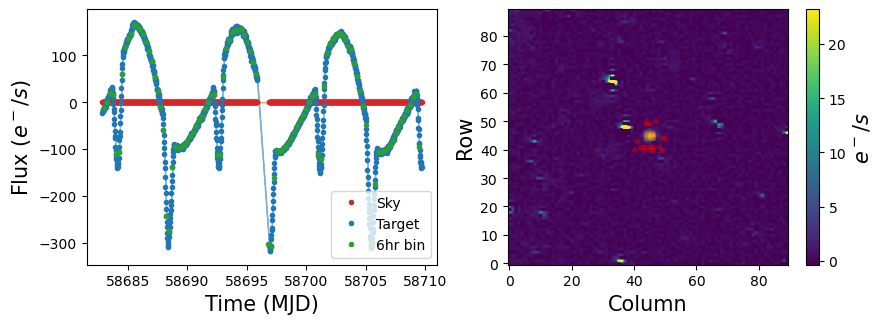

In [3]:
tess = tr.tessreduce(obs_list=obs[0])

If you want the lightcurve without differencing, you can generate that with the following:

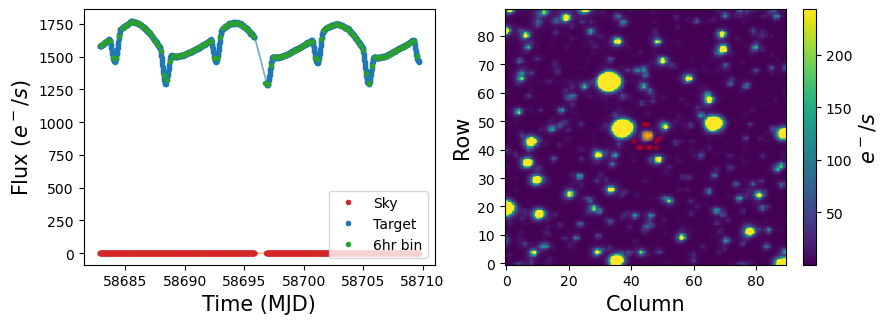

In [11]:
tess.diff_lc(diff=False,plot=True);

If you want to calibrate it to phsical flux, this can be done with the **to_flux** function. By default it uses the internally calculated zeropoint and converts to mjy.

In [4]:
tess.to_flux()

With the data reduced, we can export it as a **lightkurve.lightcurve** type object with the next line.

In [5]:
lc = tess.to_lightkurve()

Now we have access to all of the handy lightkurve functions, light **to_periodogram**!

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{Jy}$]'>

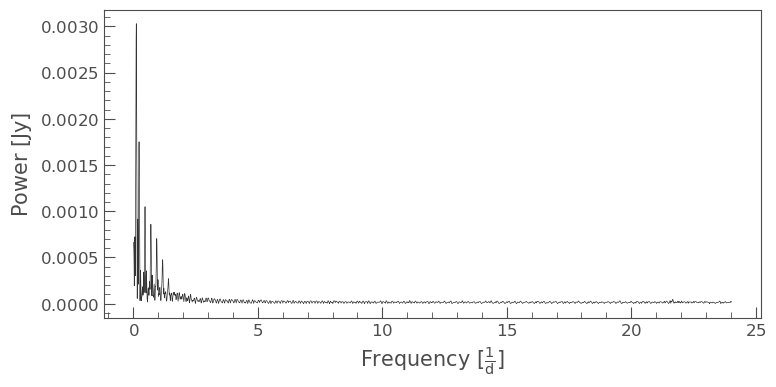

In [6]:
period = lc.to_periodogram()
period.plot()

From the periodogram we can get the primary frequency 

In [7]:
freq = period.frequency_at_max_power

The lightcurve can then be easily folded on itself using the **fold** function from lightkurve!

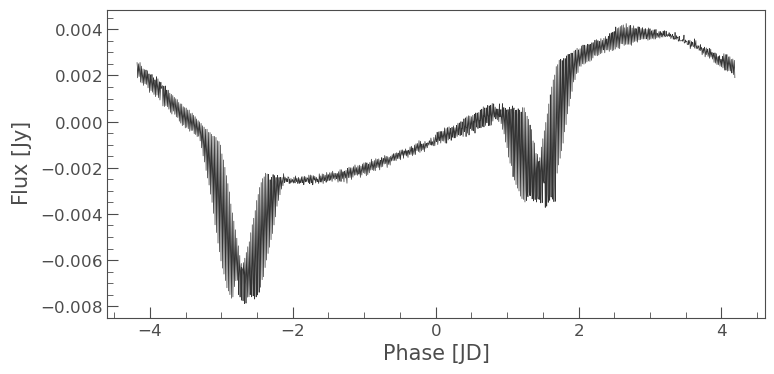

In [8]:
lc.fold(period=1/freq).plot();